In [10]:
# common functions
def plotFlowSheet(graph):
    from Flowsheet_Class.flowsheet import Flowsheet
    flowsheet =Flowsheet()
    flowsheet.state=graph
    flowsheet.visualize_flowsheet(table=False, pfd_path="plots/flowsheet1", plot_with_stream_labels=False)

def sfiles_generate_validate(graph):
    from Flowsheet_Class.flowsheet import Flowsheet
    flowsheet =Flowsheet()
    flowsheet.state=graph
    flowsheet.convert_to_sfiles(version="v2")
    sfiles_1 = flowsheet.sfiles
    print(f"SFILE : {sfiles_1}")
    flowsheet.create_from_sfiles(sfiles_1, overwrite_nx=True)
    flowsheet.convert_to_sfiles(version="v2")
    sfiles_2 = flowsheet.sfiles
    print("Conversion from SFILES to graph and back to SFILES successful!\n" if sfiles_1 == sfiles_2
        else "Error encountered during conversion!")



# Manual Graph Construction


## Control of Heat Exchanger

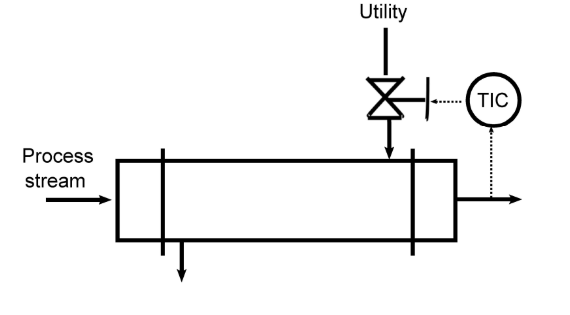

In [11]:
from IPython.display import Image
Image(filename = "images/heat_exchanger.png")

### PFD

In [12]:
import networkx as nx
graph_heat_exchanger = nx.DiGraph()
graph_heat_exchanger.add_edges_from([
   ("raw-1","hex-1"),
   ("raw-2","v-1"),
    ("v-1","hex-1"),
    ("hex-1","prod-1"),
    ("hex-1","prod-2"),
    ("raw-2","v-1"),
])


Number of unit operations = 6
Number of controllers = 0
Number of indicators = 0 
Number of transmitters = 0


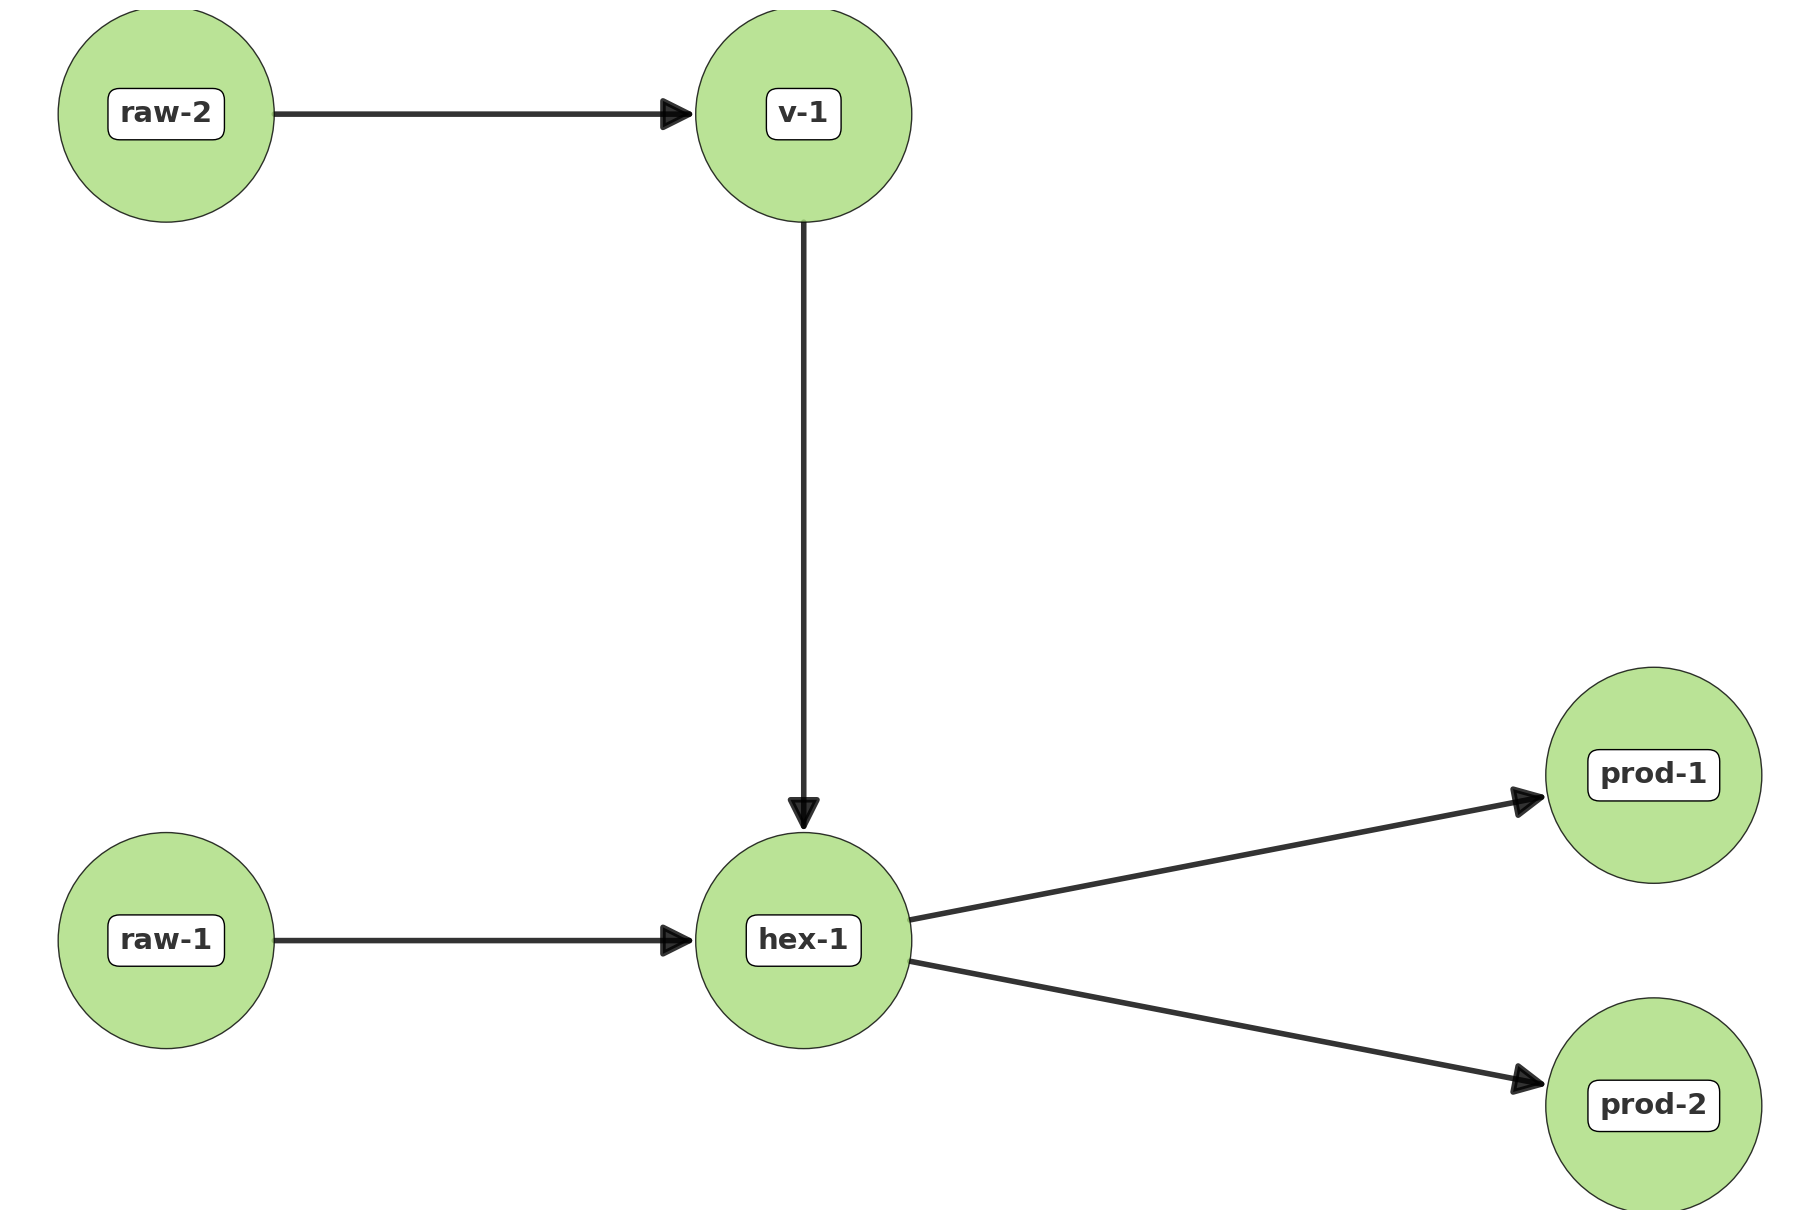

SFILE : (raw)(v)(hex)<&|(raw)&|[(prod)](prod)
Conversion from SFILES to graph and back to SFILES successful!



In [13]:
plotFlowSheet(graph_heat_exchanger)
sfiles_generate_validate(graph_heat_exchanger)

### P&ID

In [14]:
import networkx as nx
graph_heat_exchanger_1 = nx.DiGraph()
graph_heat_exchanger_1.add_edges_from([
   ("raw-1","hex-1"),
   ("raw-2","v-1"),
    ("v-1","hex-1"),
    ("hex-1","C-1/TC"),
    ("C-1/TC","prod-1"),
    ("C-1/TC","v-1",{"tags":{"signal": ["not_next_unitop"]}}),
    ("hex-1","prod-2"),
    ("raw-2","v-1"),
])


Number of unit operations = 6
Number of controllers = 1
Number of indicators = 0 
Number of transmitters = 0


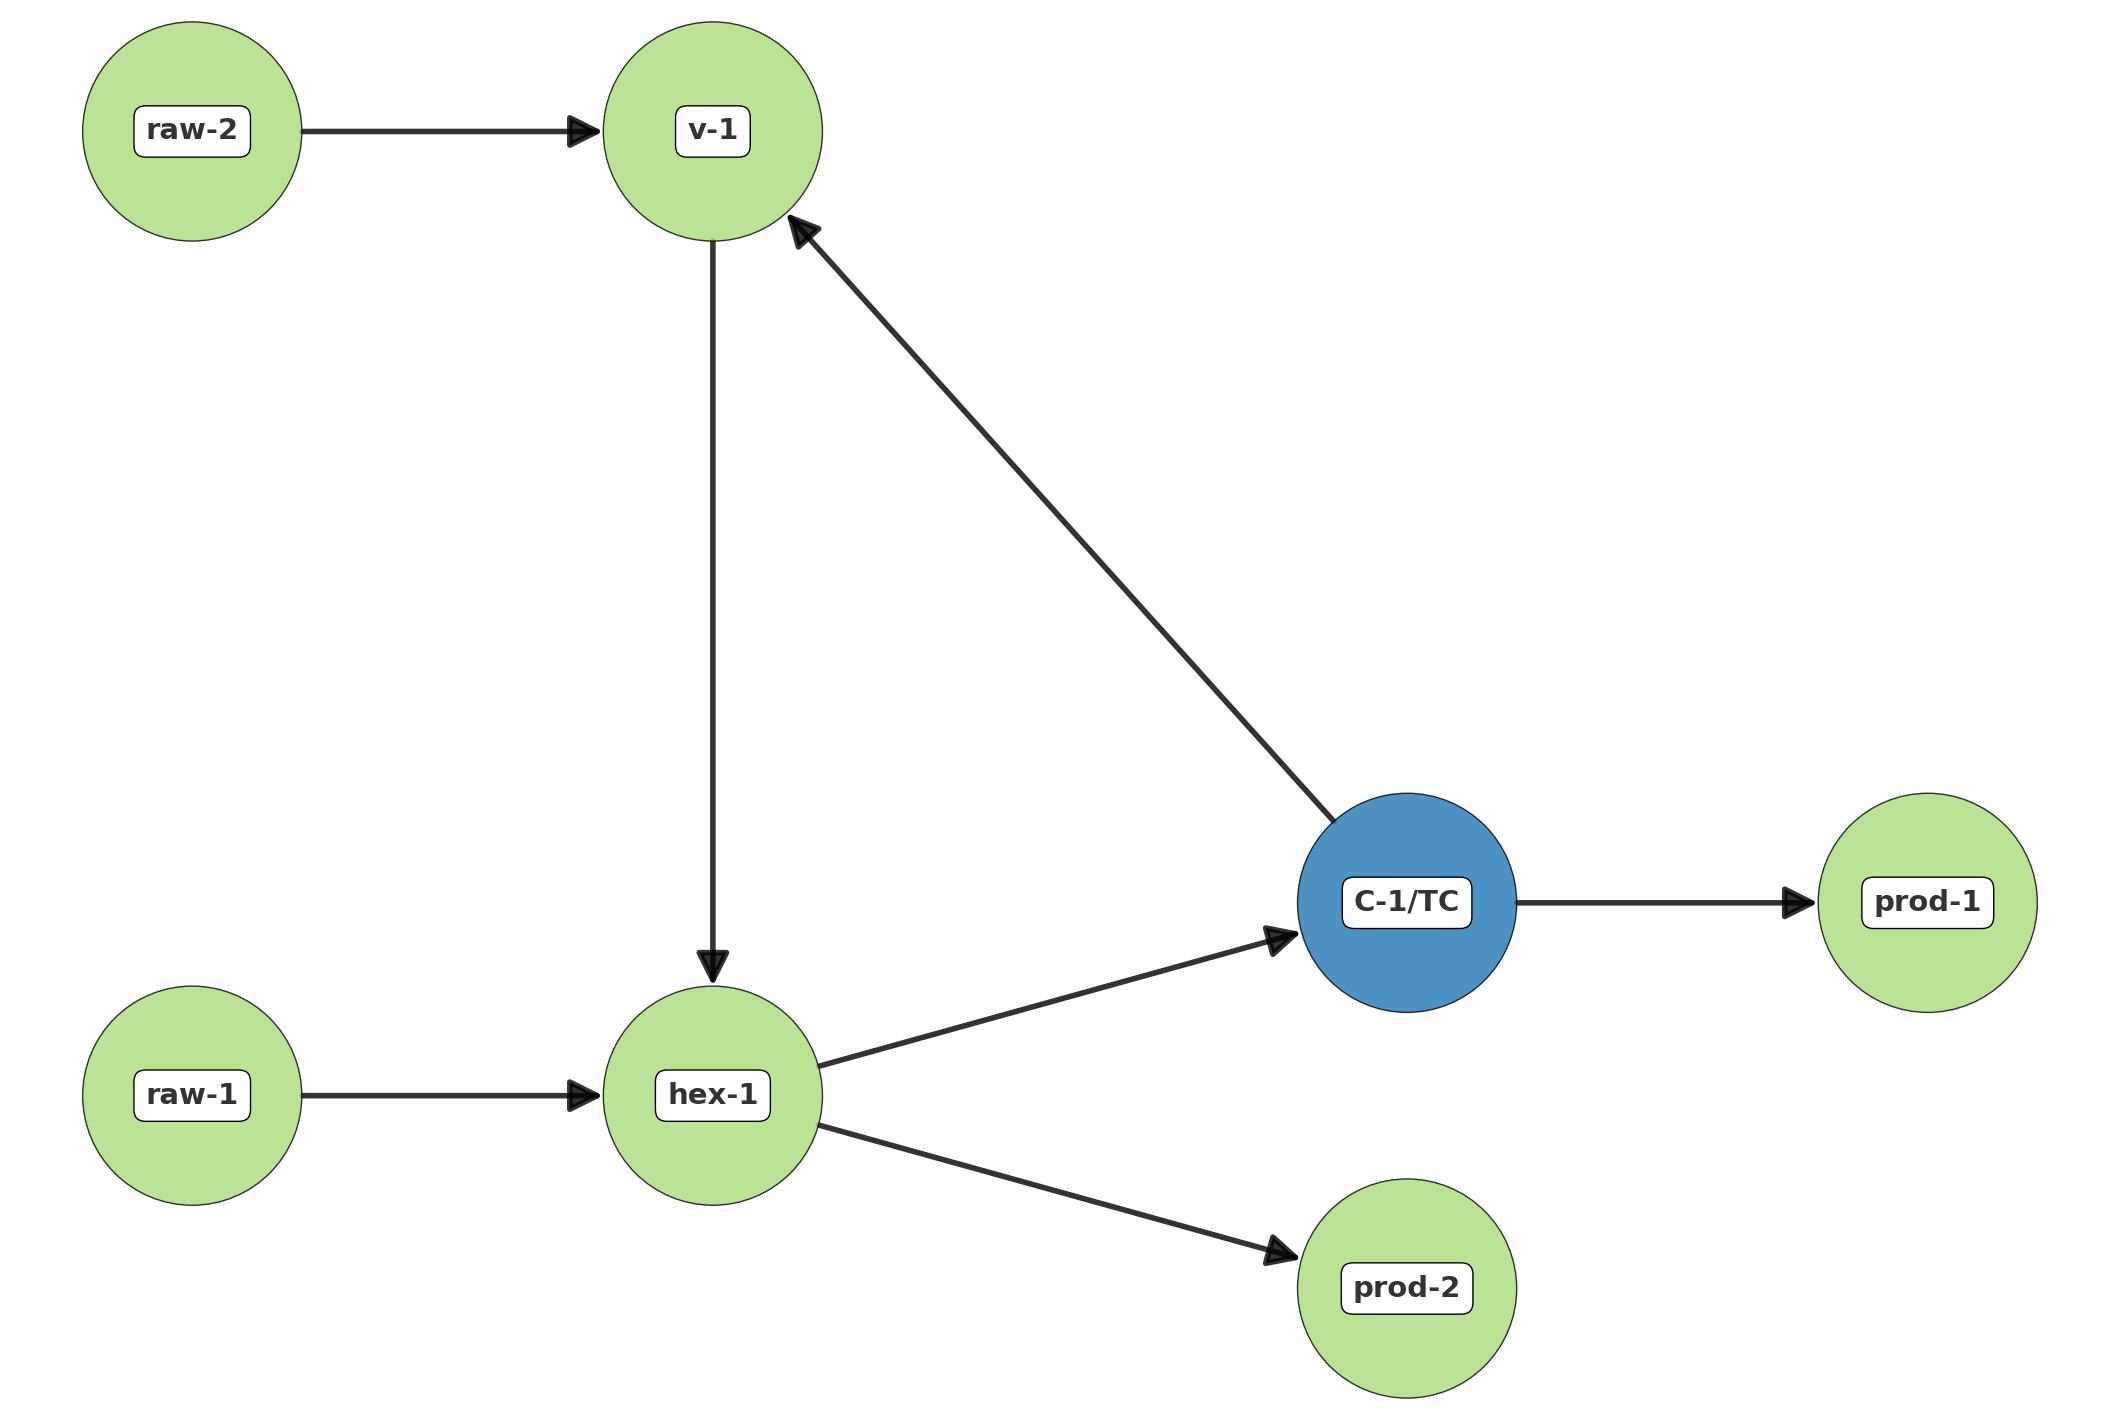

SFILE : (raw)(v)<_1(hex)<&|(raw)&|[(prod)](C){TC}_1(prod)
Conversion from SFILES to graph and back to SFILES successful!



In [15]:
plotFlowSheet(graph_heat_exchanger_1)
sfiles_generate_validate(graph_heat_exchanger_1)

# DWSIM simulations -> XML -> GraphML

## GraphML (DWSIM Flowsheets)

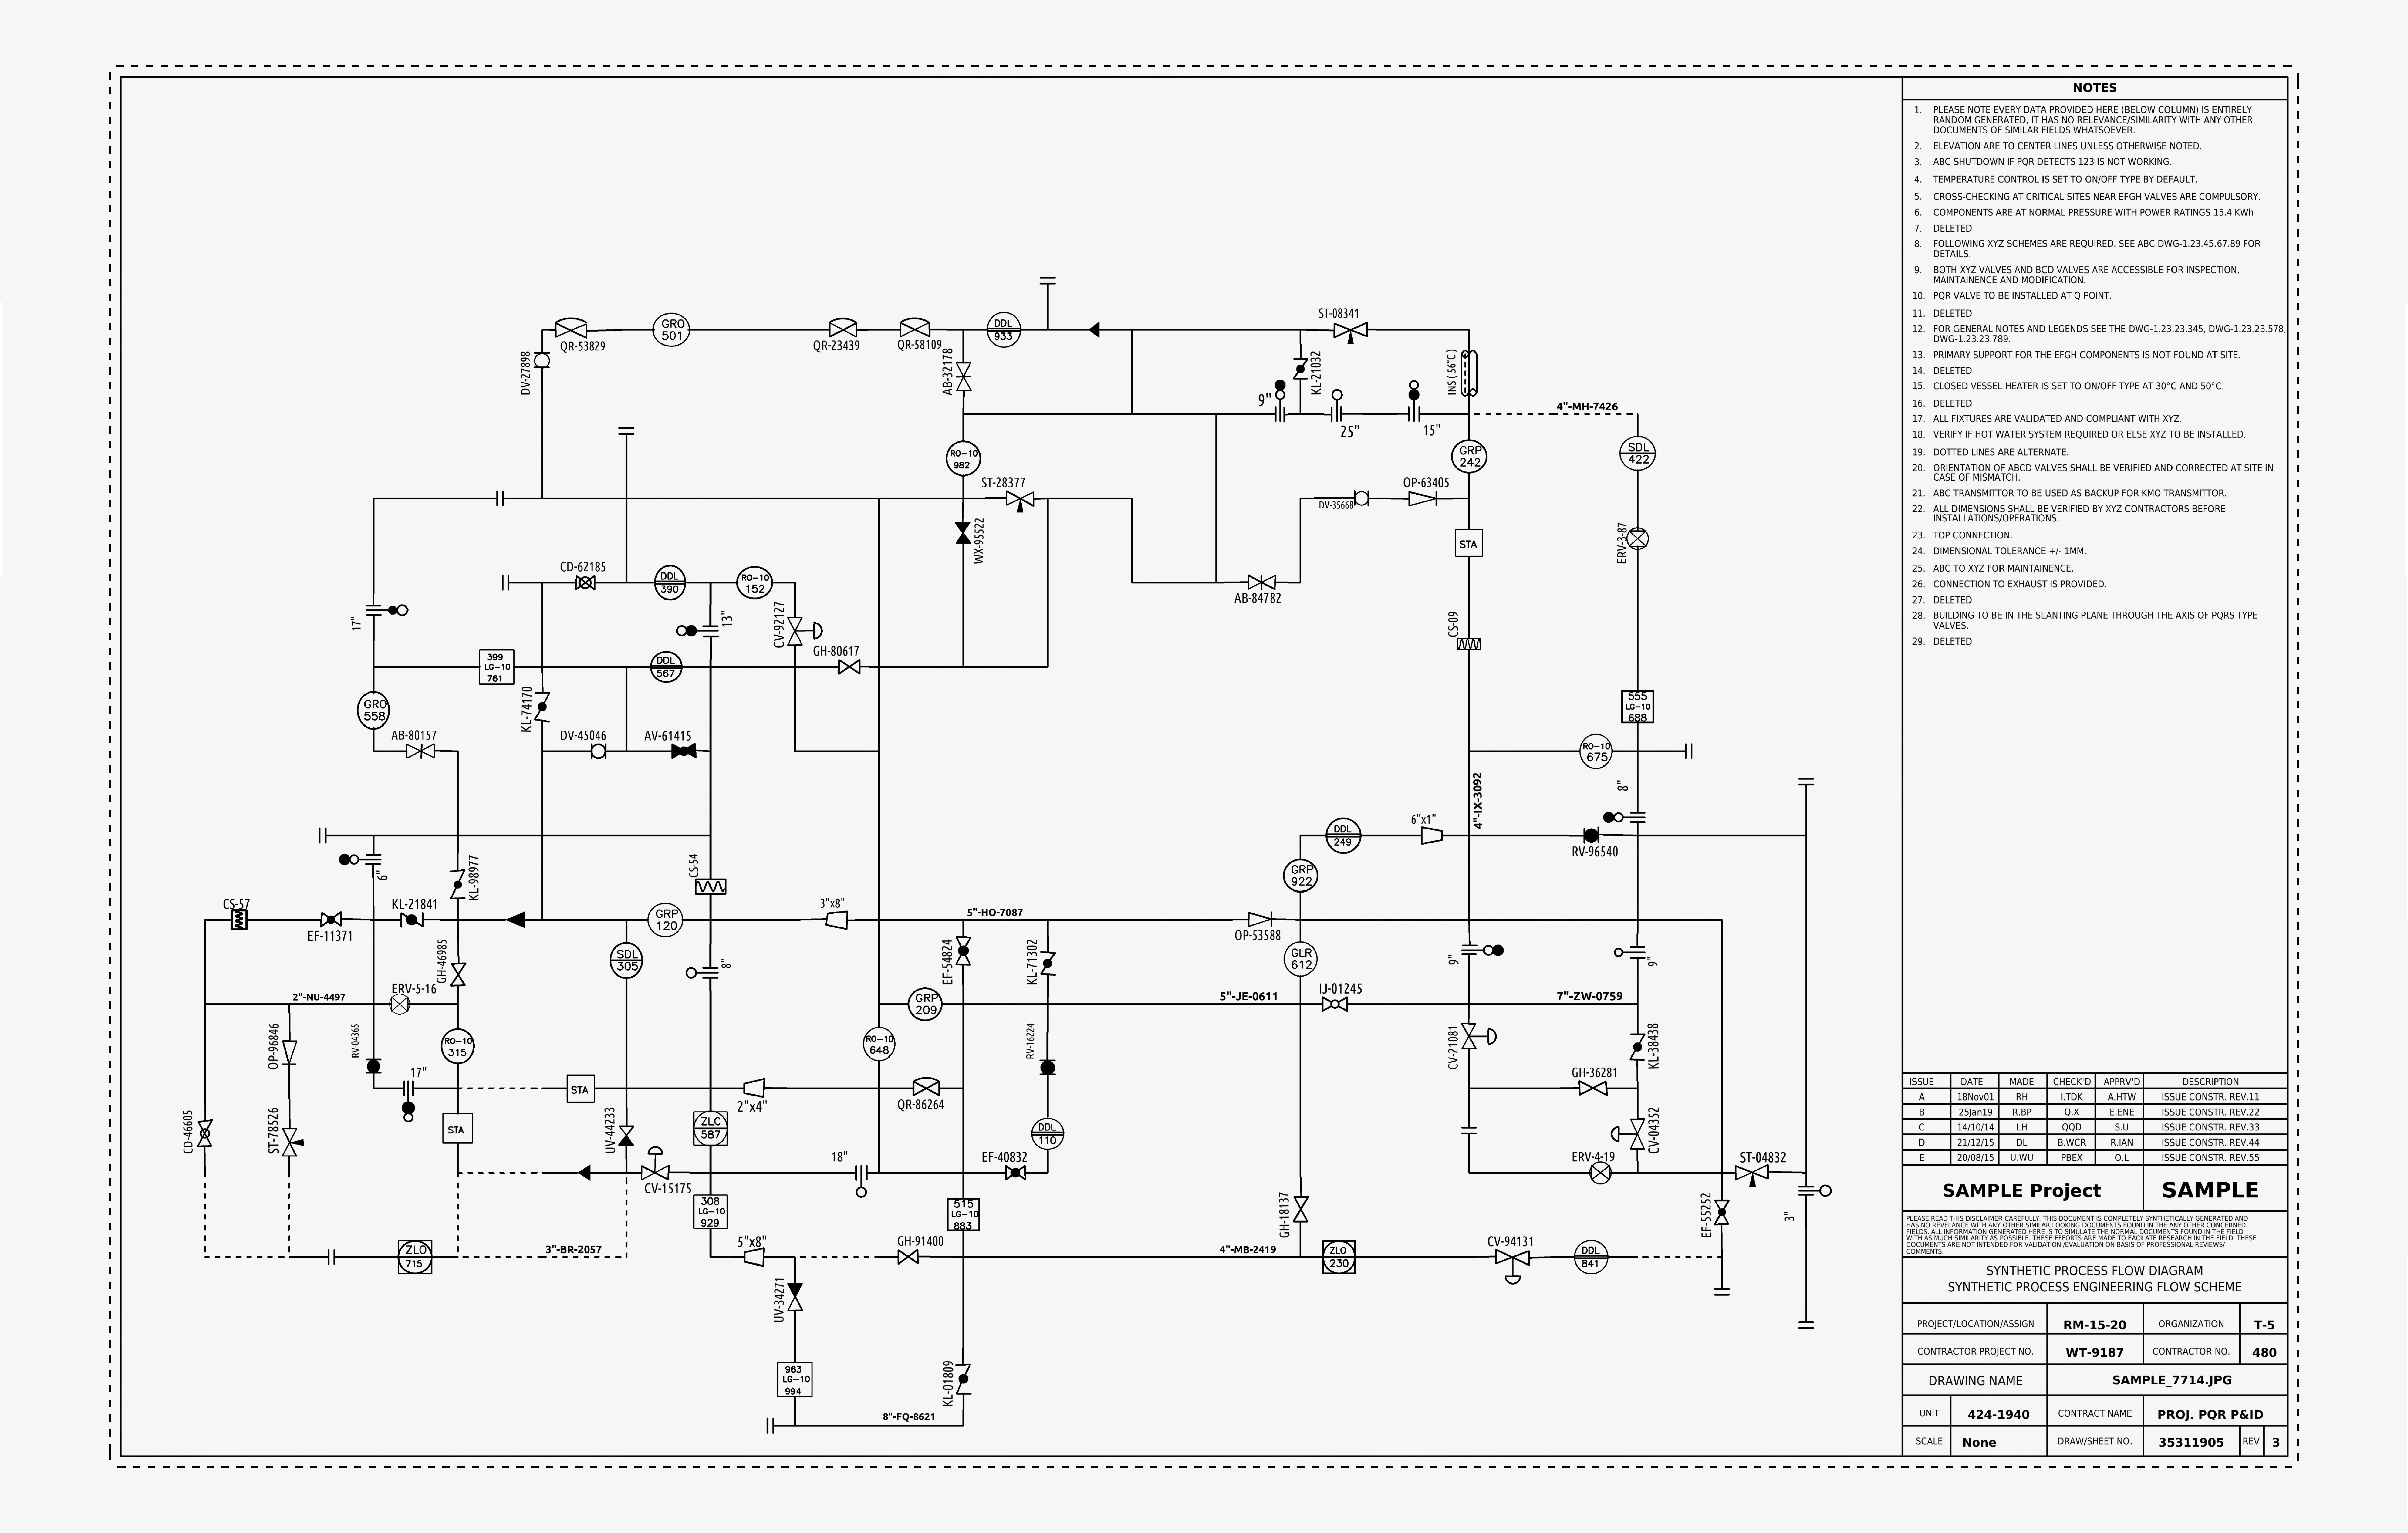

In [16]:
from IPython.display import Image
Image(filename = "334.png")

In [17]:
from Flowsheet_Class.flowsheet import Flowsheet

G = nx.read_graphml('heat_exchanger.graphml')
flowsheet_c = Flowsheet()
flowsheet_c.state = G

Number of unit operations = 5
Number of controllers = 0
Number of indicators = 0 
Number of transmitters = 0


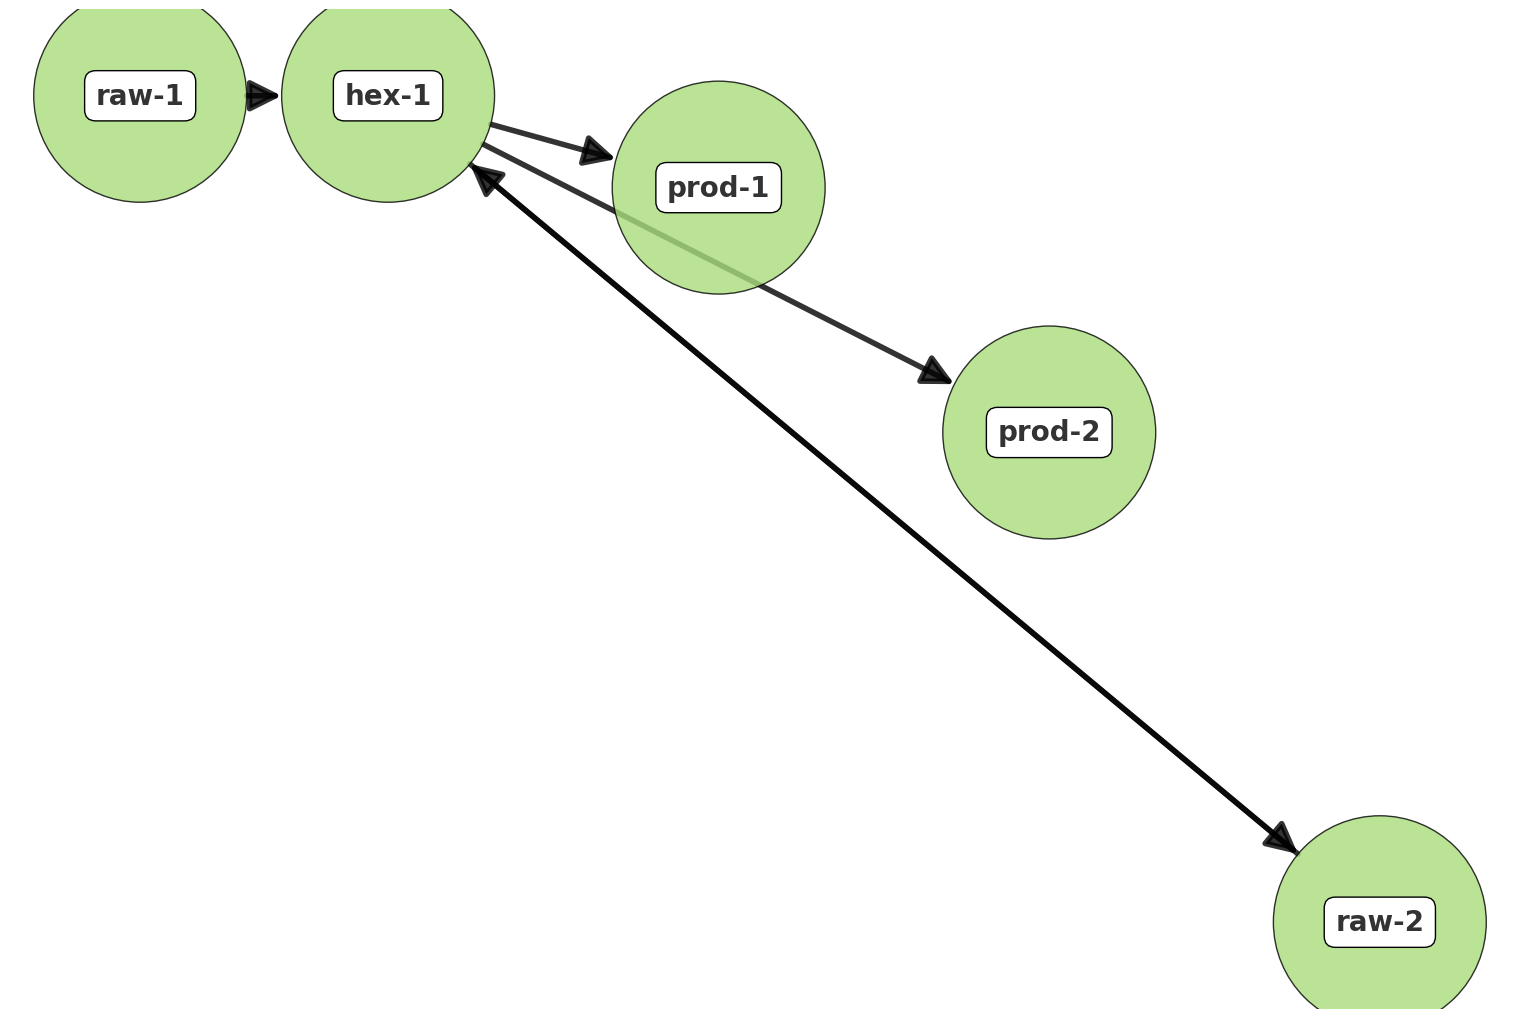

(<Figure size 1500x1000 with 1 Axes>, None, None)

In [18]:
flowsheet_c.visualize_flowsheet(table=False, plot_with_stream_labels=False,plot_as_pfd=False)

In [19]:
print(flowsheet_c)


In [20]:
flowsheet_c.convert_to_sfiles(version="v2")

sfiles_1 = flowsheet_c.sfiles
print(f"SFILE : {sfiles_1}")
flowsheet_c.create_from_sfiles(sfiles_1, overwrite_nx=True)
flowsheet_c.convert_to_sfiles(version="v2")
sfiles_2 = flowsheet_c.sfiles
print("Conversion from SFILES to graph and back to SFILES successful!\n" if sfiles_1 == sfiles_2
    else "Error encountered during conversion!")

SFILE : (raw)(hex)<1[(prod)][(prod)](raw)1
Conversion from SFILES to graph and back to SFILES successful!



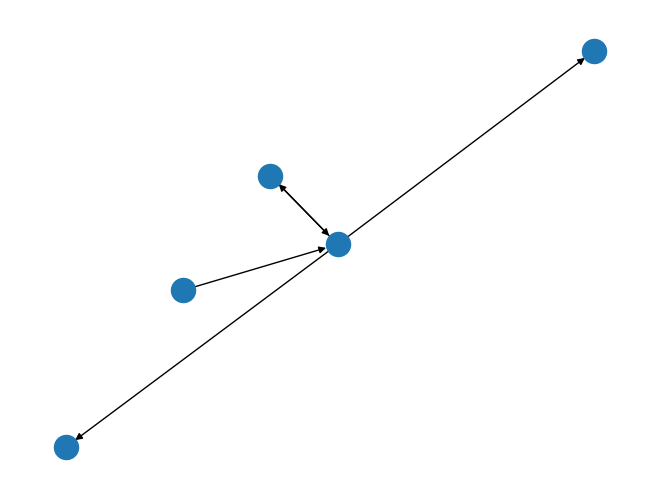

In [21]:
nx.draw(G)
